# CART CLASSIFICATION AND REGRESSION  TREE

In [1]:
#sorting table (y) accending 
# make a splitt at every condition 
# calculate RSS
# select condition with min rss

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import  train_test_split
%matplotlib inline

In [3]:
df=pd.read_csv(r"C:\Users\Sarvadnya\FUSIONCLASS\machine_learning\Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
x=df.iloc[:,:-1]
y=df['Species']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

dt=DecisionTreeClassifier(criterion='gini') # gini species using CART for classification
dt.fit(xtrain,ytrain)
yp=dt.predict(xtest)
yp

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
print(dt.score(xtrain,ytrain))
print(dt.score(xtest,ytest))

1.0
0.9666666666666667


# REGRESSION

In [6]:
data=df.drop(columns=['Species'])
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [7]:
x=data.iloc[:,: -1]
y=data['PetalWidthCm']
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4
...,...,...,...,...
145,146,6.7,3.0,5.2
146,147,6.3,2.5,5.0
147,148,6.5,3.0,5.2
148,149,6.2,3.4,5.4


In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

dtr=DecisionTreeRegressor()
dtr.fit(xtrain,ytrain)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [9]:
yp=dtr.predict(xtest)
yp

array([0.4, 1. , 1.3, 0.3, 2.3, 1.4, 2.1, 0.2, 0.2, 2.2, 1.3, 0.3, 2.2,
       1.5, 1.3, 0.2, 1.3, 1.3, 0.2, 0.2, 1.3, 1.6, 1.5, 0.2, 2.1, 2. ,
       0.1, 0.3, 1.3, 1.4])

In [10]:
print(dtr.score(xtrain,ytrain))
print(dtr.score(xtest,ytest))

1.0
0.9065163596370636


In [11]:
df.shape

(150, 6)

In [12]:
from sklearn import tree

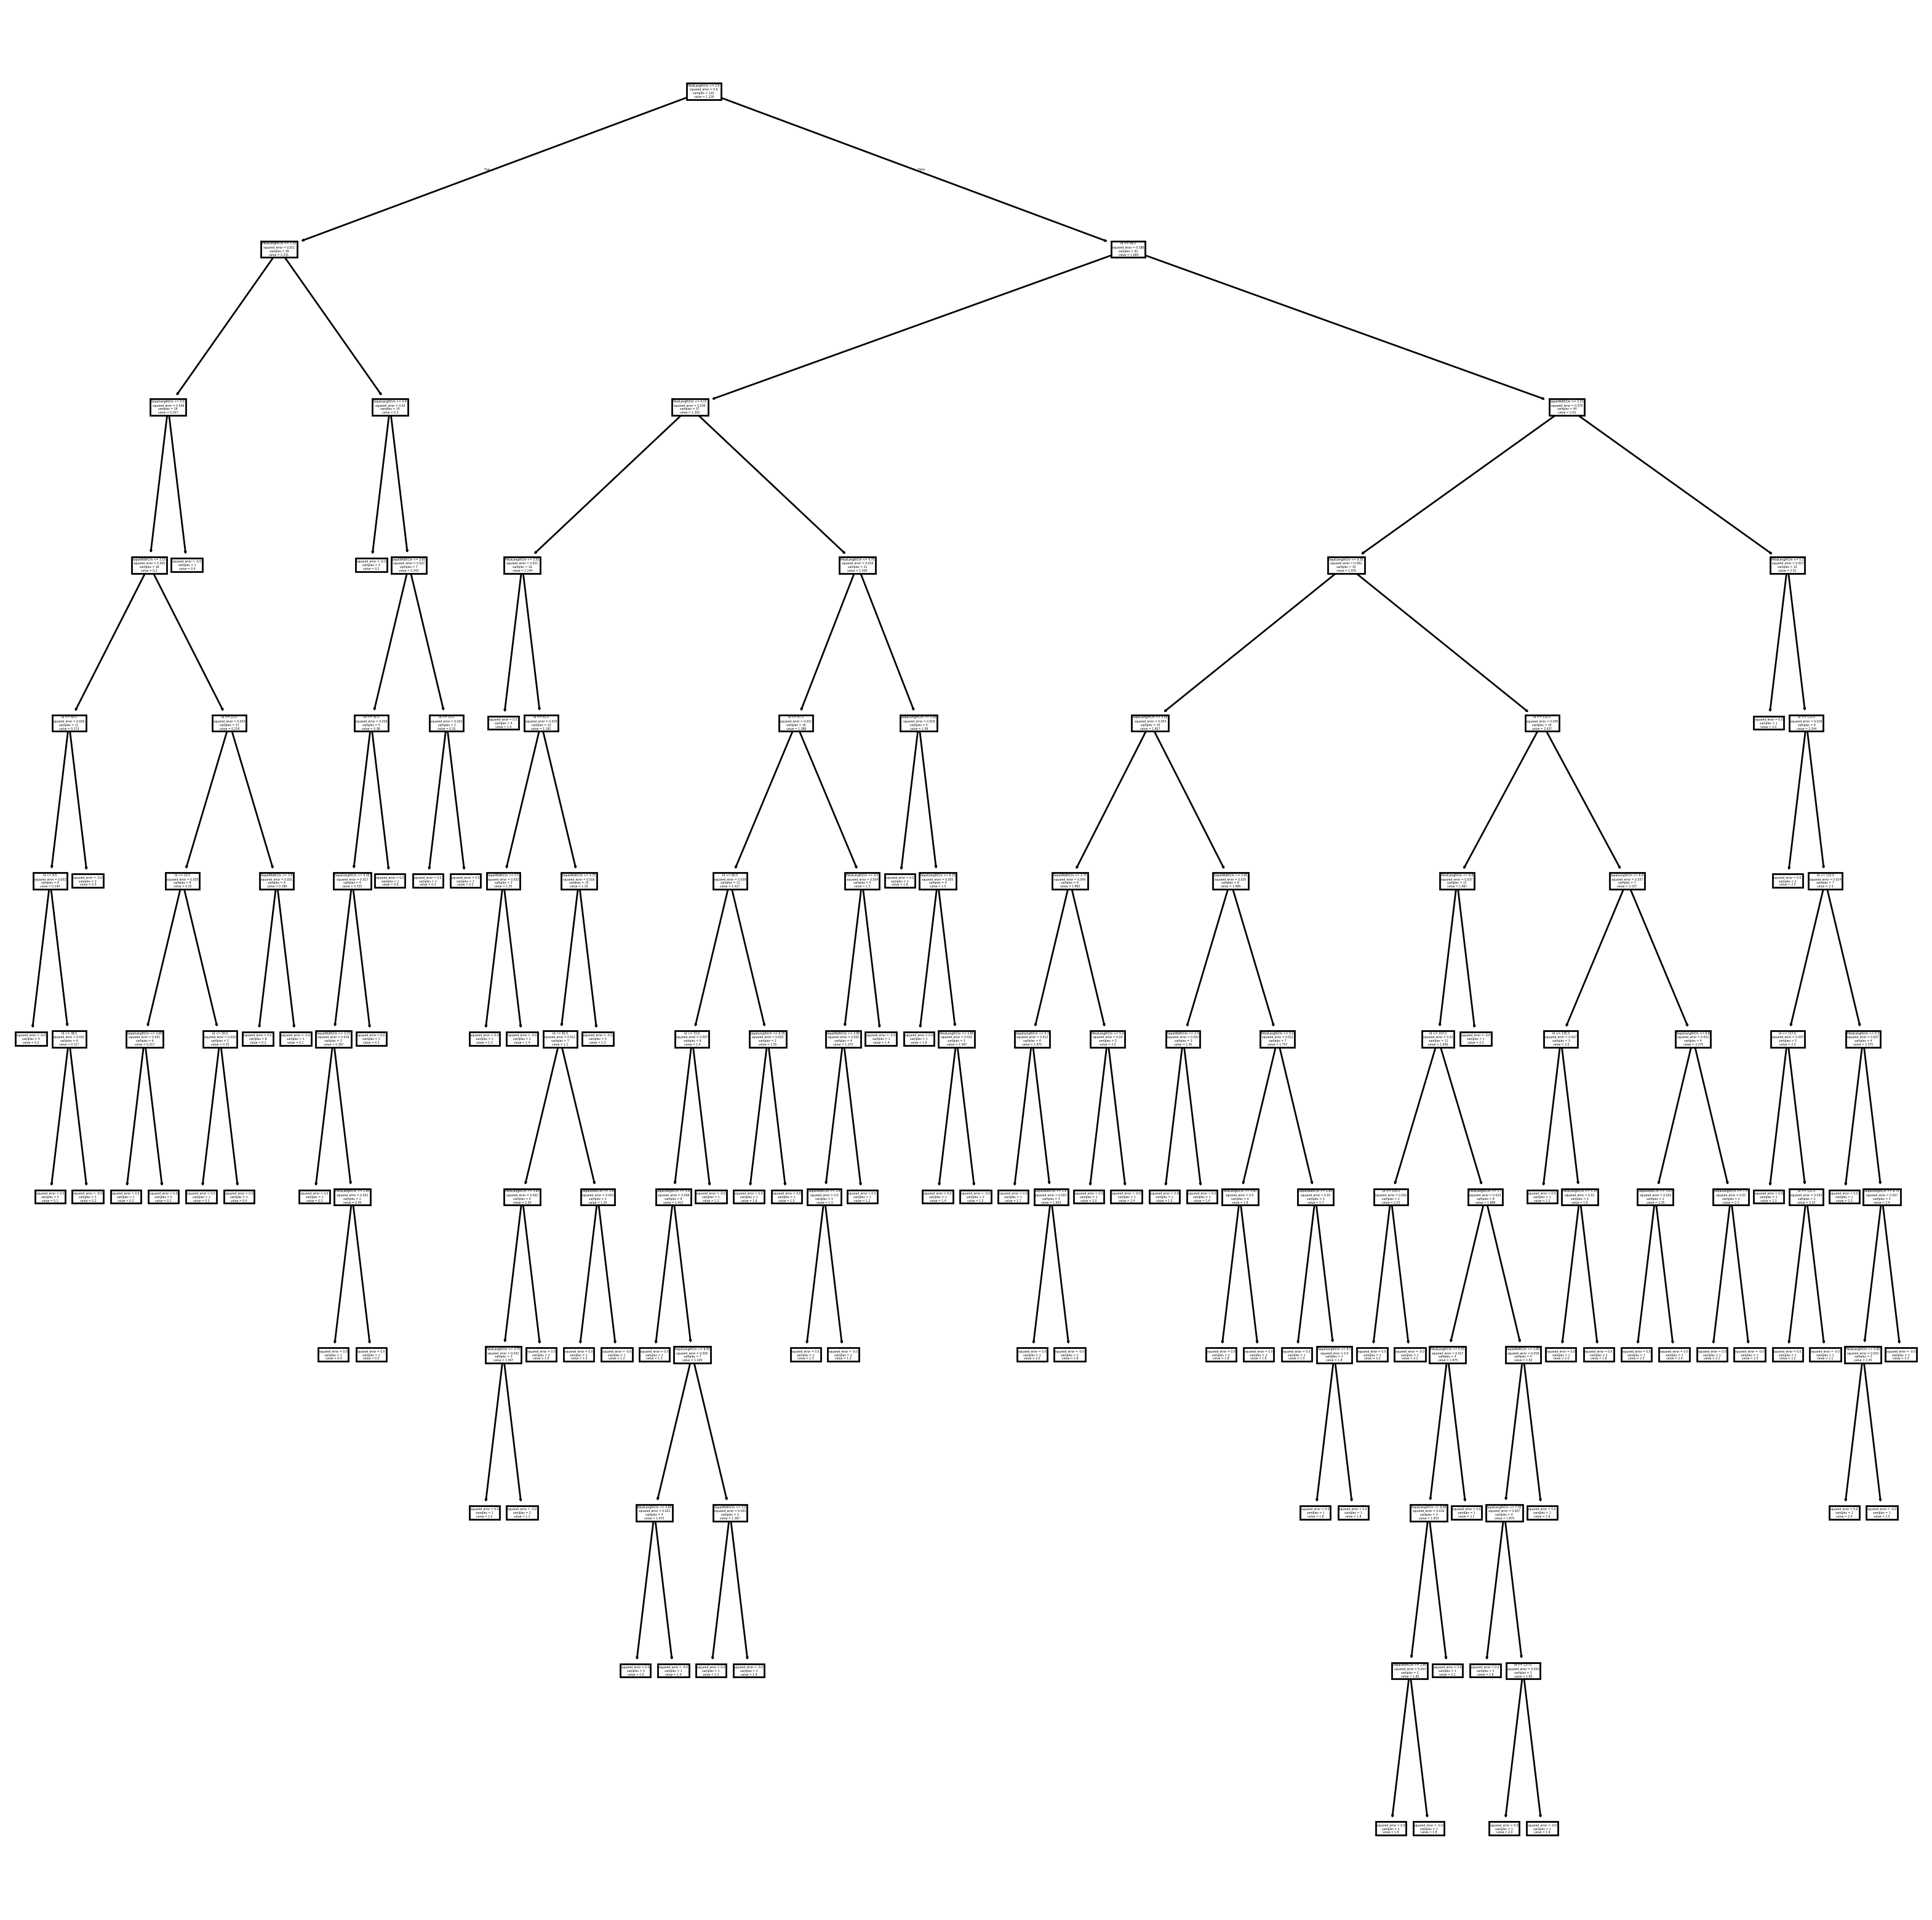

In [13]:
plt.figure(figsize=(20,20),dpi=200)
tree.plot_tree(dtr,feature_names=x.columns)
plt.show()

# HYPERPARAMETER TUNING


In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
DecisionTreeRegressor()

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [25]:
params={
    'criterion':['squared_error','absolute_error'],
    'max_depth':[2,3,4,5,6,7,8,9,10],
    'splitter':['best','random']
}
params

{'criterion': ['squared_error', 'absolute_error'],
 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'splitter': ['best', 'random']}

In [26]:
grid=GridSearchCV(DecisionTreeRegressor(),param_grid=params,verbose=1)

In [27]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'absolute_error'], 'max_depth': [2, 3, ...], 'splitter': ['best', 'random']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'absolute_error'


In [28]:
grid.best_params_

{'criterion': 'absolute_error', 'max_depth': 4, 'splitter': 'best'}

In [35]:
dtr=DecisionTreeRegressor(criterion='squared_error',max_depth=7,splitter='random')
dtr.fit(xtrain,ytrain)
print(dtr.score(xtrain,ytrain))
print(dtr.score(xtest,ytest))

0.982800184921491
0.8751827245424795


In [36]:
from sklearn.model_selection import cross_val_score,KFold

In [42]:
kf=KFold(n_splits=5)
cross_val_score(DecisionTreeRegressor(),x,y,scoring='neg_mean_squared_error',cv=kf)

array([-0.032     , -0.03866667, -0.03933333, -0.09566667, -0.12833333])

In [45]:
rmse=np.sqrt(-scores)
rmse.mean()

np.float64(0.2517887339167183)

In [46]:
kf=KFold(n_splits=5)
scores=cross_val_score(DecisionTreeRegressor(),x,y,scoring='neg_mean_squared_error',cv=kf)
scores

array([-0.05066667, -0.219     , -0.03766667, -0.09366667, -0.18166667])